In [1]:
#statsmodelsOLS.py
import pandas as pd
import statsmodels.api as sm
import numpy as np

data = pd.read_csv("fraserDataWithRGDPPC.csv", index_col = [0,1], parse_dates = True)
data

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2017-01-01  7.673511            7.528167   
         2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
...                       ...                 ...   
ZWE      2000-01-01  4.299839            5.365058   
         1995-01-01  5.518614            6.418859   
         1990-01-01  4.516140            5.108843   
         1985-01-01  4.226841            5.026250   
         1980-01-01  4.054740            6.322625   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2017-01-01                        5.064907     9.648271   
         2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
...                                             ...          ...   
ZWE      2000-01-01                        4.662445     2.891166   
         1995-01-01                        5.138131     4.915293   
         1990-01-01                        3.439437     5.664840   
         1985-01-01                        2.633492     6.305850   
         1980-01-01                        1.379602     6.343342   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2017-01-01                          8.343863    7.782349   
         2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
...                                               ...         ...   
ZWE      2000-01-01                          3.224735    5.355792   
         1995-01-01                          5.839664    5.423290   
         1990-01-01                          4.689623    3.953668   
         1985-01-01                          3.161743    4.207229   
         1980-01-01                          3.277015    3.280637   

                     RGDP Per Capita  
ISO_Code Year                         
ALB      2017-01-01              NaN  
         2016-01-01          11285.0  
         2015-01-01          10947.0  
         2014-01-01          10703.0  
         2013-01-01          10138.0  
...                              ...  
ZWE      2000-01-01           2696.0  
         1995-01-01           2841.0  
         1990-01-01           3265.0  
         1985-01-01           3615.0  
         1980-01-01           4003.0  

[3030 rows x 7 columns]

In [2]:
years = np.array(sorted(list(set(data.index.get_level_values("Year")))))
years = pd.date_range(years[0], years[-2], freq = "AS")
countries = sorted(list(set(data.index.get_level_values("ISO_Code"))))
index_names = list(data.index.names)
multi_index = pd.MultiIndex.from_product([countries, years[:-1]], names = data.index.names)
data = data.reindex(multi_index)

data["RGDP Per Capita Lag"] = data.groupby("ISO_Code")["RGDP Per Capita"].shift()

In [3]:
data = data.dropna()
data

EFW  Size of Government  \
ISO_Code Year                                       
AGO      2006-01-01  4.883132            5.342913   
         2007-01-01  4.980365            5.239228   
         2008-01-01  4.980803            5.307379   
         2009-01-01  5.357889            7.104953   
         2010-01-01  5.372788            5.738678   
...                       ...                 ...   
ZWE      2011-01-01  4.843441            6.424630   
         2012-01-01  4.971192            6.670469   
         2013-01-01  5.246723            6.325105   
         2014-01-01  5.582478            6.433165   
         2015-01-01  6.145330            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2006-01-01                        3.546463     4.061198   
         2007-01-01                        3.569182     4.453327   
         2008-01-01                        3.654098     5.032836   
         2009-01-01                        3.622792     5.238259   
         2010-01-01                        3.672884     5.570226   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      2006-01-01                          6.158949    5.306135   
         2007-01-01                          6.115462    5.524626   
         2008-01-01                          5.687976    5.221726   
         2009-01-01                          5.811844    5.011598   
         2010-01-01                          6.189831    5.692320   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita  RGDP Per Capita Lag  
ISO_Code Year                                              
AGO      2006-01-01           4558.0               3364.0  
         2007-01-01           5314.0               4558.0  
         2008-01-01           6318.0               5314.0  
         2009-01-01           5212.0               6318.0  
         2010-01-01           6408.0               5212.0  
...                              ...                  ...  
ZWE      2011-01-01           1515.0               1425.0  
         2012-01-01           1623.0               1515.0  
         2013-01-01           1801.0               1623.0  
         2014-01-01           1797.0               1801.0  
         2015-01-01           1759.0               1797.0  

[1999 rows x 8 columns]

In [4]:
y_var = ["RGDP Per Capita"]
x_vars = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation"]


y = data[y_var]
X = data[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()

<ipython-input-4-feeac93ae519>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


In [5]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     439.3
Date:                Mon, 23 Aug 2021   Prob (F-statistic):          2.75e-318
Time:                        18:48:49   Log-Likelihood:                -21707.
No. Observations:                1999   AIC:                         4.343e+04
Df Residuals:                    1993   BIC:                         4.346e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government               -2887.4650    278.775    -10.358      0.000   -3434.186   -2340.744
Legal System & Property Rights    5277.6236    267.887     19.701      0.000    4752.256    5802.991
Sound Money                        601.1209    286.027      2.102      0.036      40.179    1162.063
Freedom to trade internationally  1654.5096    426.732      3.877      0.000     817.622    2491.397
Regulation                        2055.2267    393.573      5.222      0.000    1283.369    2827.084
Constant                         -2.267e+04   2484.180     -9.127      0.000   -2.75e+04   -1.78e+04
==============================================================================
Omnibus:                     1593.433   Durbin-Watson:                   0.248
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55497.369
Skew:                           3.475   Prob(JB):                         0.00
Kurtosis:                      27.860   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
x_and_y_vars = y_var + x_vars
reg_data = data[x_and_y_vars]
reg_data.corr().round(2)

,RGDP Per Capita,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation
RGDP Per Capita,1.00,-0.23,0.70,0.46,0.53,0.52
Size of Government,-0.23,1.00,-0.17,0.11,0.14,0.08
Legal System & Property Rights,0.70,-0.17,1.00,0.59,0.68,0.66
Sound Money,0.46,0.11,0.59,1.00,0.75,0.57
Freedom to trade internationally,0.53,0.14,0.68,0.75,1.00,0.65
Regulation,0.52,0.08,0.66,0.57,0.65,1.00


In [7]:
y_var = ["RGDP Per Capita"]
x_vars = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation",
          "RGDP Per Capita Lag"]

y = data[y_var]
X = data[x_vars]
results = sm.OLS(y, X).fit()

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        RGDP Per Capita   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          6.032e+04
Date:                Mon, 23 Aug 2021   Prob (F-statistic):                        0.00
Time:                        18:48:50   Log-Likelihood:                         -17875.
No. Observations:                1999   AIC:                                  3.576e+04
Df Residuals:                    1993   BIC:                                  3.580e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                 -52.1793     38.117     -1.369      0.171    -126.933      22.575
Legal System & Property Rights     149.4653     42.918      3.483      0.001      65.296     233.635
Sound Money                          5.7357     41.943      0.137      0.891     -76.520      87.992
Freedom to trade internationally    -1.1387     62.189     -0.018      0.985    -123.101     120.824
Regulation                           5.7333     52.843      0.108      0.914     -97.900     109.367
RGDP Per Capita Lag                  0.9916      0.003    306.651      0.000       0.985       0.998
==============================================================================
Omnibus:                      973.846   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           694218.599
Skew:                           0.836   Prob(JB):                         0.00
Kurtosis:                      94.280   Cond. No.                     4.19e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
betaEstimates = results.params
tStats = results.tvalues
pValues = results.pvalues
stdErrors = results.bse

resultsDict = {"Beta Estimates" : betaEstimates,
              "t-stats":tStats,
              "p-values":pValues,
              "Standard Errors":stdErrors}
resultsDF = pd.DataFrame(resultsDict)
resultsDF.round(3)

,Beta Estimates,t-stats,p-values,Standard Errors
Size of Government,-52.179,-1.369,0.171,38.117
Legal System & Property Rights,149.465,3.483,0.001,42.918
Sound Money,5.736,0.137,0.891,41.943
Freedom to trade internationally,-1.139,-0.018,0.985,62.189
Regulation,5.733,0.108,0.914,52.843
RGDP Per Capita Lag,0.992,306.651,0.000,0.003


In [10]:
resultsDF.to_csv("statsmodelsOLSResults.csv")

<AxesSubplot:xlabel='RGDP Per Capita', ylabel='RGDP Per Capita Predictor'>

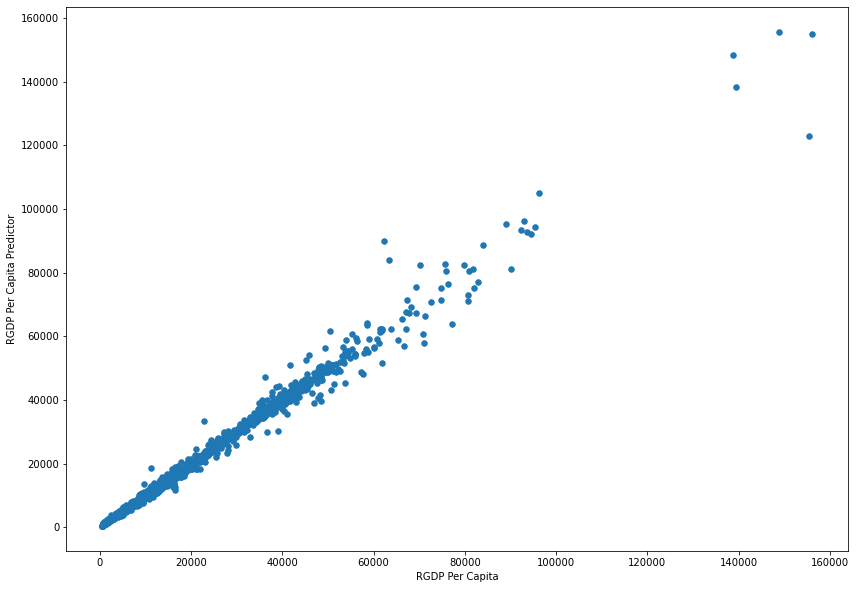

In [11]:
import matplotlib.pyplot as plt

predictor = results.predict()
data[y_var[0] + " Predictor"] = predictor
fig, ax = plt.subplots(figsize = (14,10))
plt.rcParams.update({"font.size":26})
data.plot.scatter(x = y_var[0],
                 y = y_var[0] + " Predictor", 
                  s = 30, ax = ax)